In [2]:
from google.colab import drive

[Errno 2] No such file or directory: '/content/njmin3.csv'
/content


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [20]:
df = pd.read_csv("/njmin3.csv")

In [22]:
df.head()

,NJ,POST_APRIL92,NJ_POST_APRIL92,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp
0,1,0,0,15.00,1,0,0,0,0,1,0,0,0,12.00
1,1,0,0,15.00,1,0,0,0,0,1,0,0,0,6.50
2,1,0,0,24.00,0,0,1,0,0,1,0,0,0,-1.00
3,1,0,0,19.25,0,0,1,0,1,0,0,0,0,2.25
4,1,0,0,21.50,1,0,0,0,0,0,0,0,0,13.00


In [25]:
df.describe()

,NJ,POST_APRIL92,NJ_POST_APRIL92,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp
count,820.000000,820.000000,820.000000,794.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,768.000000
mean,0.807317,0.500000,0.403659,21.026511,0.417073,0.195122,0.241463,0.146341,0.343902,0.153659,0.226829,0.087805,0.104878,-0.070443
std,0.394647,0.500305,0.490930,9.422746,0.493376,0.396536,0.428232,0.353664,0.475299,0.360841,0.419037,0.283184,0.306583,9.016441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-41.500000
25%,1.000000,0.000000,0.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
50%,1.000000,0.500000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,25.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000


In [26]:
# check whether there are any missing values
df.isnull().sum()

,0
NJ,0
POST_APRIL92,0
NJ_POST_APRIL92,0
fte,26
bk,0
kfc,0
roys,0
wendys,0
co_owned,0
centralj,0


In [27]:
df.isnull().any()

,0
NJ,False
POST_APRIL92,False
NJ_POST_APRIL92,False
fte,True
bk,False
kfc,False
roys,False
wendys,False
co_owned,False
centralj,False


In [29]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['fte','demp']] = imputer.fit_transform(df[['fte','demp']])

# check for the missing values
df.isnull().sum()

,0
NJ,0
POST_APRIL92,0
NJ_POST_APRIL92,0
fte,0
bk,0
kfc,0
roys,0
wendys,0
co_owned,0
centralj,0


In [33]:
X = df[['NJ','POST_APRIL92','NJ_POST_APRIL92']]
y = df['fte']

# add a constant to the indepedent variables
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.974
Date:                Mon, 08 Sep 2025   Prob (F-statistic):              0.116
Time:                        02:28:49   Log-Likelihood:                -2986.2
No. Observations:                 820   AIC:                             5980.
Df Residuals:                     816   BIC:                             5999.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.2728      1.041     

In [34]:
X1 = sm.add_constant(X)
X1.head()

,const,NJ,POST_APRIL92,NJ_POST_APRIL92
0,1.0,1,0,0
1,1.0,1,0,0
2,1.0,1,0,0
3,1.0,1,0,0
4,1.0,1,0,0


In [37]:
model1 = sm.OLS(y, X1).fit()
print(model1.summary(
    yname = "FT",
    xname = ['Intercept', 'New Jersey', 'After April 1992', 'New Jersey and After April 1992']
))

                            OLS Regression Results                            
Dep. Variable:                     FT   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.974
Date:                Mon, 08 Sep 2025   Prob (F-statistic):              0.116
Time:                        02:34:12   Log-Likelihood:                -2986.2
No. Observations:                 820   AIC:                             5980.
Df Residuals:                     816   BIC:                             5999.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Visualization

In [38]:
intercept, nj_coef, post_april92_coef, nj_post_april92_coef = model1.params

In [51]:
pre_pa = intercept
post_pa = intercept + post_april92_coef
pre_nj = intercept + nj_coef
post_nj = intercept + nj_coef + post_april92_coef + nj_post_april92_coef
nj_pre_pa = intercept + nj_coef
nj_post_pa = intercept + nj_post_april92_coef
counterfactual = intercept + nj_coef + post_april92_coef

[]

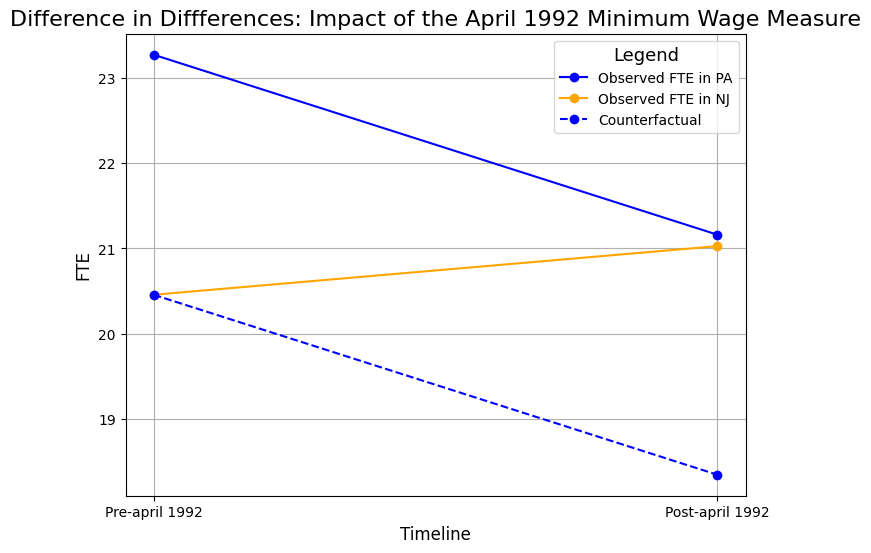

In [54]:
plt.figure(figsize=(8, 6))
time = ['Pre-april 1992', 'Post-april 1992']
fte = [pre_pa, post_pa]
colors = ['blue', 'green']
plt.plot(time, [pre_pa, post_pa], marker='o', linestyle='-', color='blue',
         label='Observed FTE in PA')
plt.plot(time, [pre_nj, post_nj], marker='o', linestyle='-', color='orange',
         label='Observed FTE in NJ')
plt.plot(time, [pre_nj, counterfactual], marker='o', linestyle='--', color='blue',
         label='Counterfactual')
plt.title("Difference in Diffferences: Impact of the April 1992 Minimum Wage Measure",
          fontsize=16, )
plt.xlabel("Timeline", fontsize=12)
plt.ylabel("FTE", fontsize=12)
plt.legend(loc = 'upper right',
           title = "Legend",
           fontsize = 10,
           frameon = True,
           title_fontsize = 13)
plt.grid(True)
plt.plot()

In [55]:
df.columns

Index(['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92', 'fte', 'bk', 'kfc', 'roys',
       'wendys', 'co_owned', 'centralj', 'southj', 'pa1', 'pa2', 'demp'],
      dtype='object')

In [56]:
X2 = df[['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92','bk','kfc', 'wendys']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary(yname = "FTE",
                     xname = ['Intercept', 'New Jersey', 'After April 1992',
                              'New Jersey and After April 1992',
                              'Burger King', 'KFC', 'Wendys']))

                            OLS Regression Results                            
Dep. Variable:                    FTE   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     31.95
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           1.30e-34
Time:                        03:05:15   Log-Likelihood:                -2902.4
No. Observations:                 820   AIC:                             5819.
Df Residuals:                     813   BIC:                             5852.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [61]:
X3 = df[['NJ','POST_APRIL92','NJ_POST_APRIL92', 'fte', 'bk','kfc','wendys','co_owned',
         'centralj','southj','pa1','pa2']]
X3.head()

,NJ,POST_APRIL92,NJ_POST_APRIL92,fte,bk,kfc,wendys,co_owned,centralj,southj,pa1,pa2
0,1,0,0,15.00,1,0,0,0,1,0,0,0
1,1,0,0,15.00,1,0,0,0,1,0,0,0
2,1,0,0,24.00,0,0,0,0,1,0,0,0
3,1,0,0,19.25,0,0,0,1,0,0,0,0
4,1,0,0,21.50,1,0,0,0,0,0,0,0


In [64]:
# Add a constant
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.023e+30
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:10:24   Log-Likelihood:                 24307.
No. Observations:                 820   AIC:                        -4.859e+04
Df Residuals:                     808   BIC:                        -4.853e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.509e-14    3.8e-15     

In [65]:
df.columns

Index(['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92', 'fte', 'bk', 'kfc', 'roys',
       'wendys', 'co_owned', 'centralj', 'southj', 'pa1', 'pa2', 'demp'],
      dtype='object')

In [5]:
df = pd.read_stata("/eitc.dta")

In [6]:
df.head()

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000


In [8]:
df.year.unique()

array([1991., 1992., 1993., 1994., 1995., 1996.], dtype=float32)

In [12]:
# Data Processing
# Create dummy variables
df['mom'] = np.where(df['children']>0,1,0)
df['post_93'] = np.where(df['year']>1993,1,0)
df['mom_post_93'] = df['mom']*df['post_93']
# isolate X and Y
y=df['work']
X = df[['mom', 'post_93', 'mom_post_93']]

In [10]:
df.head()

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,mom,post_93,mom_post_93
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000,0,0,0
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203,1,0,0
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194,1,0,0
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570,0,0,0
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000,1,0,0


Logistic Regression Model

In [13]:
# add a constant to x
# when to add a constant? statsmodels.OLS (normal distribution)
# , GLM (can be skewed or binary outcomes), logit
X = sm.add_constant(x)

In [14]:
model1 = sm.Logit(y, X).fit()
print(model1.summary(
    yname = "Is Working?",
    xname = ['Intercept', "Is mom", "Is after 1993", "Is mom after 1993"]
))

Optimization terminated successfully.
         Current function value: 0.686491
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Is Working?   No. Observations:                13746
Model:                          Logit   Df Residuals:                    13742
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Sep 2025   Pseudo R-squ.:                0.009118
Time:                        01:33:30   Log-Likelihood:                -9436.5
converged:                       True   LL-Null:                       -9523.3
Covariance Type:            nonrobust   LLR p-value:                 2.058e-37
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3042      0.036      8.443      0.000       0.234       0.375
Is mom  

In [15]:
# define a function to convert log-odds into probabilities
def logit_to_prob(log_odds):
  return 1/ (1 + np.exp(-log_odds))

In [16]:
logit_to_prob(0.1885)

np.float64(0.5469859559272142)

In [ ]:
1.547

Data Visualization

In [17]:
# Retrieve the coefficients
intercept_coef, mom_coef, post93_coef, mom_post93_coef = model1.params

In [23]:
# Getting the values for non-moms
non_mom_pre = logit_to_prob(intercept_coef)
non_mom_post = logit_to_prob(intercept_coef + post93_coef)

mom_pre = logit_to_prob(intercept_coef + mom_coef)
mom_post = logit_to_prob(intercept_coef + mom_coef + post93_coef + mom_post93_coef)

# get the counterfactual
counterfactual = logit_to_prob(intercept_coef + mom_coef + post93_coef)

[]

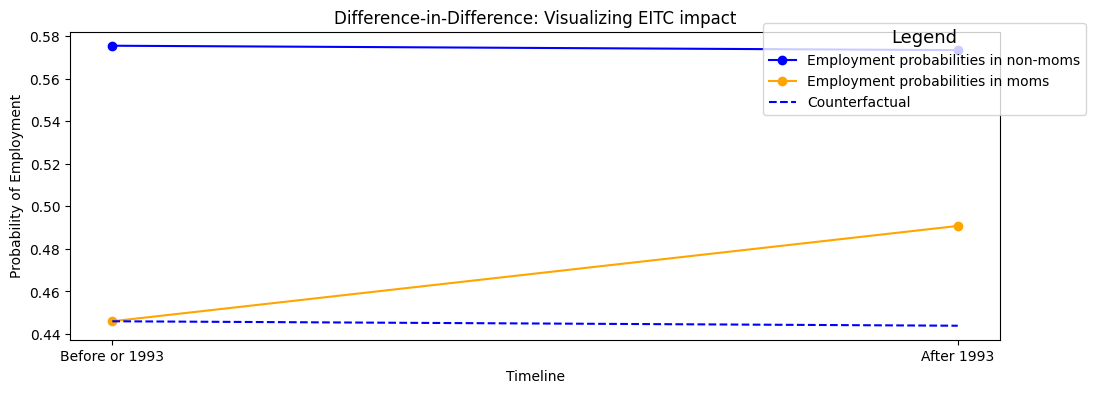

In [33]:
plt.figure(figsize = (12,4))
timeline =['Before or 1993', 'After 1993' ]

plt.plot(timeline,
         [non_mom_pre, non_mom_post],
         label = "Employment probabilities in non-moms",
         marker = 'o', color = 'blue')
plt.plot(timeline,
         [mom_pre, mom_post],
         label = "Employment probabilities in moms",
         marker = "o", color = "orange")
plt.plot(timeline,
         [mom_pre, counterfactual],
         label = "Counterfactual", color = "blue", linestyle = "--")

# customize the plot
plt.title("Difference-in-Difference: Visualizing EITC impact")
plt.xlabel("Timeline")
plt.ylabel("Probability of Employment")
plt.legend(loc= "upper right", title = "Legend", fontsize = 10,
           title_fontsize = 13, bbox_to_anchor = (1.1, 1.05))
plt.plot()

In [ ]:
# second model
# create a new X with more variables

In [34]:
df.columns

Index(['state', 'year', 'urate', 'children', 'nonwhite', 'finc', 'earn', 'age',
       'ed', 'work', 'unearn', 'mom', 'post_93', 'mom_post_93'],
      dtype='object')

In [35]:
X2 = df[['mom','post_93', 'mom_post_93', 'ed','age','unearn']]

In [36]:
X2 = sm.add_constant(X2)

In [39]:
model2 = sm.Logit(y, X2).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.638107
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   work   No. Observations:                13746
Model:                          Logit   Df Residuals:                    13739
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 Sep 2025   Pseudo R-squ.:                 0.07896
Time:                        02:10:52   Log-Likelihood:                -8771.4
converged:                       True   LL-Null:                       -9523.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3483      0.109     -3.196      0.001      -0.562      -0.135
mom            -0.4733    

In [46]:
# Placebo experiment
# subset the data focusing on 1991-1993
df_placebo = df[df['year']<=1993]

In [47]:
# define variables
df_placebo=df_placebo.copy()
df_placebo.loc[:,'post_92'] = np.where(df_placebo.year>1992, 1,0)
df_placebo.loc[:, 'mom_post_92'] = df_placebo['mom'] * df_placebo['post_92']

In [48]:
# isolate the X and y for the placebo
y_placebo = df_placebo['work']
X_placebo = df_placebo[['mom','post_92', 'mom_post_92']]

In [49]:
X_placebo = sm.add_constant(X_placebo)

In [51]:
model3= sm.Logit(y_placebo, X_placebo).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.684872
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   work   No. Observations:                 7401
Model:                          Logit   Df Residuals:                     7397
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Sep 2025   Pseudo R-squ.:                 0.01193
Time:                        02:23:44   Log-Likelihood:                -5068.7
converged:                       True   LL-Null:                       -5130.0
Covariance Type:            nonrobust   LLR p-value:                 2.290e-26
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3124      0.044      7.154      0.000       0.227       0.398
mom            -0.5138    

In [55]:
# Retrieve the coefficients
intercept_coef, mom_coef, post92_coef, mom_post92_coef = model3.params

In [56]:
# Getting the values for non-moms
non_mom_pre = logit_to_prob(intercept_coef)
non_mom_post = logit_to_prob(intercept_coef + post92_coef)

mom_pre = logit_to_prob(intercept_coef + mom_coef)
mom_post = logit_to_prob(intercept_coef + mom_coef + post92_coef + mom_post92_coef)

# get the counterfactual
counterfactual = logit_to_prob(intercept_coef + mom_coef + post92_coef)

[]

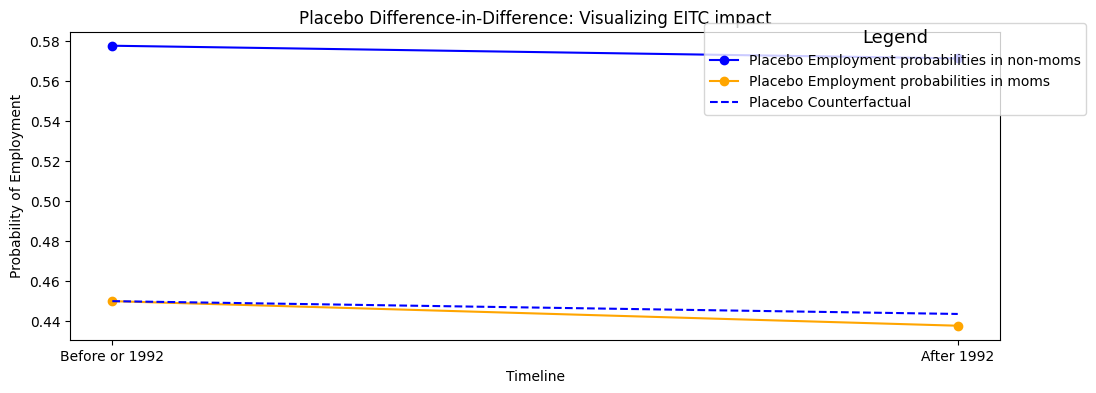

In [57]:
plt.figure(figsize = (12,4))
timeline =['Before or 1992', 'After 1992' ]

plt.plot(timeline,
         [non_mom_pre, non_mom_post],
         label = "Placebo Employment probabilities in non-moms",
         marker = 'o', color = 'blue')
plt.plot(timeline,
         [mom_pre, mom_post],
         label = "Placebo Employment probabilities in moms",
         marker = "o", color = "orange")
plt.plot(timeline,
         [mom_pre, counterfactual],
         label = "Placebo Counterfactual", color = "blue", linestyle = "--")

# customize the plot
plt.title("Placebo Difference-in-Difference: Visualizing EITC impact")
plt.xlabel("Timeline")
plt.ylabel("Probability of Employment")
plt.legend(loc= "upper right", title = "Legend", fontsize = 10,
           title_fontsize = 13, bbox_to_anchor = (1.1, 1.05))
plt.plot()
# it shows that little happened in 1992 so it means that it is something happened in 1993 caused the effect